In [1]:
import pandas as pd

In [2]:
import pathlib

# define the path
directory = pathlib.Path('Interpolation')

# define the pattern
currentCompany = 'RPD'

for currentFile in directory.glob(currentCompany):
    print(currentFile)

fileNum = 'InterpolatedNumWeek' + str(currentCompany) + '.csv'
modelNum = 'modelNum' + str(currentCompany) + '.json'
weightsNum = 'modelNum' + str(currentCompany) + '.h5'
r2ScoreNum = str(currentCompany) + '_R2ScoreNum' +  '.txt'

print(currentFile/fileNum)
print(currentFile/modelNum)
print(currentFile/weightsNum)
print(currentFile/r2ScoreNum)

Interpolation\RPD
Interpolation\RPD\InterpolatedNumWeekRPD.csv
Interpolation\RPD\modelNumRPD.json
Interpolation\RPD\modelNumRPD.h5
Interpolation\RPD\RPD_R2ScoreNum.txt


In [3]:
df = pd.read_csv(currentFile/fileNum)

In [4]:
df

,DATES,U Revenue,D CR,U OE,D NOI,D CAPEX,D WK,U FCF
0,2018-07-01,6564.988683,1557.715538,5333.684595,186.328295,337.423785,11363.354066,2808.888308
1,2018-07-08,6687.475756,1597.163443,5330.568641,188.240999,335.235633,11684.530781,2808.888308
2,2018-07-15,6809.962828,1636.611348,5327.452688,190.153703,333.047482,12005.707497,2808.888308
3,2018-07-22,6932.449900,1676.059253,5324.336734,192.066407,330.859331,12326.884213,2808.888308
4,2018-07-29,7054.936972,1715.507158,5321.220780,193.979111,328.671179,12648.060929,2808.888308
...,...,...,...,...,...,...,...,...
75,2019-12-08,11739.333225,2618.763994,9462.381481,294.666010,692.933045,14524.715052,2815.726699
76,2019-12-15,11740.795476,2678.668710,9543.239718,304.698410,699.350420,14501.924017,2842.300767
77,2019-12-22,11742.257727,2738.573425,9624.097954,314.730810,705.767795,14479.132982,2868.874835
78,2019-12-29,11743.719979,2798.478141,9704.956191,324.763209,712.185170,14456.341947,2895.448904


In [5]:
df["U FCF"].mean()

2834.895653678588

In [6]:
dataset = df.values

In [7]:
dataset

array([['2018-07-01', 6564.98868321302, 1557.7155377117401,
        5333.68459520355, 186.328294505513, 337.423784884914,
        11363.3540655117, 2808.88830817065],
       ['2018-07-08', 6687.4757555212045, 1597.1634426767193,
        5330.568641498818, 188.2409986658465, 335.2356334482813,
        11684.530781361786, 2808.88830817065],
       ['2018-07-15', 6809.962827829389, 1636.6113476416986,
        5327.452687794085, 190.15370282617997, 333.04748201164864,
        12005.707497211868, 2808.88830817065],
       ['2018-07-22', 6932.449900137575, 1676.0592526066778,
        5324.336734089353, 192.06640698651336, 330.85933057501586,
        12326.884213061952, 2808.88830817065],
       ['2018-07-29', 7054.93697244576, 1715.5071575716572,
        5321.22078038462, 193.9791111468469, 328.67117913838325,
        12648.060928912038, 2808.88830817065],
       ['2018-08-05', 7177.424044753947, 1754.9550625366364,
        5318.104826679888, 195.89181530718034, 326.4830277017505,
        12

In [8]:
X = dataset[:,1:7]
Y = dataset[:,7]
print(Y)

[2808.88830817065 2808.88830817065 2808.88830817065 2808.88830817065
 2808.88830817065 2808.88830817065 2808.88830817065 2808.88830817065
 2808.88830817065 2808.88830817065 2808.88830817065 2808.88830817065
 2808.88830817065 2808.88830817065 2828.9535128038233 2849.0187174369958
 2869.083922070169 2889.1491267033416 2909.214331336514 2929.2795359696875
 2949.34474060286 2969.409945236033 2989.475149869206 3009.540354502379
 3029.6055591355516 3049.670763768725 3069.735968401897 3089.801173035071
 3092.45603316246 3095.1108932898505 3097.7657534172404 3100.42061354463
 3103.0754736720196 3105.7303337994103 3108.3851939267997 3111.04005405419
 3113.6949141815803 3116.3497743089697 3119.00463443636 3121.65949456375
 3079.7287705943536 3037.7980466249574 2995.8673226555616
 2953.9365986861653 2912.0058747167686 2870.075150747373
 2828.1444267779775 2786.213702808581 2744.282978839185 2702.3522548697883
 2660.421530900393 2618.4908069309963 2576.5600829616 2576.5600829616
 2576.5600829616 2

In [9]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)


In [10]:
X_scale

array([[0.00000000e+00, 0.00000000e+00, 1.61830856e-01, 0.00000000e+00,
        8.06380667e-02, 0.00000000e+00],
       [2.36452695e-02, 3.03289738e-02, 1.61244239e-01, 1.28829983e-02,
        7.53604822e-02, 7.31415154e-02],
       [4.72905389e-02, 6.06579475e-02, 1.60657621e-01, 2.57659966e-02,
        7.00828976e-02, 1.46283031e-01],
       [7.09358084e-02, 9.09869213e-02, 1.60071004e-01, 3.86489948e-02,
        6.48053131e-02, 2.19424546e-01],
       [9.45810779e-02, 1.21315895e-01, 1.59484387e-01, 5.15319931e-02,
        5.95277285e-02, 2.92566062e-01],
       [1.18226347e-01, 1.51644869e-01, 1.58897770e-01, 6.44149914e-02,
        5.42501440e-02, 3.65707577e-01],
       [1.41871617e-01, 1.81973843e-01, 1.58311152e-01, 7.72979897e-02,
        4.89725594e-02, 4.38849093e-01],
       [1.65516886e-01, 2.12302816e-01, 1.57724535e-01, 9.01809879e-02,
        4.36949749e-02, 5.11990608e-01],
       [1.89162156e-01, 2.42631790e-01, 1.57137918e-01, 1.03063986e-01,
        3.84173903e-02, 

In [11]:
X_scale[0]

array([0.        , 0.        , 0.16183086, 0.        , 0.08063807,
       0.        ])

In [12]:
Y.tolist()

[2808.88830817065,
 2808.88830817065,
 2808.88830817065,
 2808.88830817065,
 2808.88830817065,
 2808.88830817065,
 2808.88830817065,
 2808.88830817065,
 2808.88830817065,
 2808.88830817065,
 2808.88830817065,
 2808.88830817065,
 2808.88830817065,
 2808.88830817065,
 2828.9535128038233,
 2849.0187174369958,
 2869.083922070169,
 2889.1491267033416,
 2909.214331336514,
 2929.2795359696875,
 2949.34474060286,
 2969.409945236033,
 2989.475149869206,
 3009.540354502379,
 3029.6055591355516,
 3049.670763768725,
 3069.735968401897,
 3089.801173035071,
 3092.45603316246,
 3095.1108932898505,
 3097.7657534172404,
 3100.42061354463,
 3103.0754736720196,
 3105.7303337994103,
 3108.3851939267997,
 3111.04005405419,
 3113.6949141815803,
 3116.3497743089697,
 3119.00463443636,
 3121.65949456375,
 3079.7287705943536,
 3037.7980466249574,
 2995.8673226555616,
 2953.9365986861653,
 2912.0058747167686,
 2870.075150747373,
 2828.1444267779775,
 2786.213702808581,
 2744.282978839185,
 2702.3522548697883,
 

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(64, 6) (8, 6) (8, 6) (64,) (8,) (8,)


In [15]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [16]:
model = Sequential([
    Dense(6, activation='elu', input_shape=(6,)),
    Dense(256, activation='elu'),
    Dense(256, activation='elu'),
    Dense(256, activation='elu'),
    Dense(256, activation='elu'),
    Dense(256, activation='elu'),
    Dense(256, activation='elu'),
    Dense(1, activation='elu'),
])

In [17]:
model.compile(optimizer='rmsprop',
              loss='mean_absolute_error')

In [18]:
hist = model.fit(X_train, Y_train, batch_size=4, epochs=400, validation_data=(X_val, Y_val))

Train on 64 samples, validate on 8 samples
Epoch 1/400
64/64 [==============================] - 1s 12ms/step - loss: 1658.8392 - val_loss: 247.9218
Epoch 2/400
64/64 [==============================] - 0s 4ms/step - loss: 430.8799 - val_loss: 492.4536
Epoch 3/400
64/64 [==============================] - 0s 4ms/step - loss: 387.3949 - val_loss: 345.3533
Epoch 4/400
64/64 [==============================] - 0s 3ms/step - loss: 395.2641 - val_loss: 100.0511
Epoch 5/400
64/64 [==============================] - 0s 4ms/step - loss: 348.0176 - val_loss: 227.1372
Epoch 6/400
64/64 [==============================] - 0s 3ms/step - loss: 322.0281 - val_loss: 96.0788
Epoch 7/400
64/64 [==============================] - 0s 3ms/step - loss: 305.0575 - val_loss: 348.1676
Epoch 8/400
64/64 [==============================] - 0s 3ms/step - loss: 319.6298 - val_loss: 435.6830
Epoch 9/400
64/64 [==============================] - 0s 3ms/step - loss: 291.1272 - val_loss: 576.4396
Epoch 10/400
64/64 [=========

64/64 [==============================] - 0s 3ms/step - loss: 153.7423 - val_loss: 84.5699
Epoch 80/400
64/64 [==============================] - 0s 3ms/step - loss: 120.1154 - val_loss: 136.4289
Epoch 81/400
64/64 [==============================] - 0s 3ms/step - loss: 121.8972 - val_loss: 77.3722
Epoch 82/400
64/64 [==============================] - 0s 3ms/step - loss: 156.3815 - val_loss: 169.9236
Epoch 83/400
64/64 [==============================] - 0s 3ms/step - loss: 123.7561 - val_loss: 125.6977
Epoch 84/400
64/64 [==============================] - 0s 3ms/step - loss: 156.5252 - val_loss: 148.0618
Epoch 85/400
64/64 [==============================] - 0s 3ms/step - loss: 118.8472 - val_loss: 82.3493
Epoch 86/400
64/64 [==============================] - 0s 3ms/step - loss: 115.3598 - val_loss: 101.2290
Epoch 87/400
64/64 [==============================] - 0s 3ms/step - loss: 128.6151 - val_loss: 98.0441
Epoch 88/400
64/64 [==============================] - 0s 3ms/step - loss: 139.448

64/64 [==============================] - 0s 3ms/step - loss: 118.7243 - val_loss: 76.6948
Epoch 158/400
64/64 [==============================] - 0s 3ms/step - loss: 109.0558 - val_loss: 106.8303
Epoch 159/400
64/64 [==============================] - 0s 3ms/step - loss: 129.4062 - val_loss: 157.1482
Epoch 160/400
64/64 [==============================] - 0s 3ms/step - loss: 113.6222 - val_loss: 141.5936
Epoch 161/400
64/64 [==============================] - 0s 3ms/step - loss: 120.6030 - val_loss: 76.2846
Epoch 162/400
64/64 [==============================] - 0s 4ms/step - loss: 121.5644 - val_loss: 90.7612
Epoch 163/400
64/64 [==============================] - 0s 4ms/step - loss: 119.4914 - val_loss: 101.7310
Epoch 164/400
64/64 [==============================] - 0s 3ms/step - loss: 118.0184 - val_loss: 254.3729
Epoch 165/400
64/64 [==============================] - 0s 4ms/step - loss: 130.8911 - val_loss: 71.0292
Epoch 166/400
64/64 [==============================] - 0s 3ms/step - loss

64/64 [==============================] - 0s 3ms/step - loss: 116.4497 - val_loss: 148.8173
Epoch 236/400
64/64 [==============================] - 0s 4ms/step - loss: 102.6381 - val_loss: 62.1122
Epoch 237/400
64/64 [==============================] - 0s 3ms/step - loss: 113.8556 - val_loss: 116.9055
Epoch 238/400
64/64 [==============================] - 0s 3ms/step - loss: 83.9731 - val_loss: 80.0517
Epoch 239/400
64/64 [==============================] - 0s 4ms/step - loss: 92.2467 - val_loss: 80.7041
Epoch 240/400
64/64 [==============================] - 0s 3ms/step - loss: 101.7016 - val_loss: 31.8846
Epoch 241/400
64/64 [==============================] - 0s 3ms/step - loss: 86.1725 - val_loss: 102.9654
Epoch 242/400
64/64 [==============================] - 0s 3ms/step - loss: 100.1345 - val_loss: 78.1958
Epoch 243/400
64/64 [==============================] - 0s 4ms/step - loss: 99.5633 - val_loss: 106.2808
Epoch 244/400
64/64 [==============================] - 0s 3ms/step - loss: 87.

64/64 [==============================] - 0s 3ms/step - loss: 85.3459 - val_loss: 50.1406
Epoch 315/400
64/64 [==============================] - 0s 4ms/step - loss: 92.0616 - val_loss: 104.0552
Epoch 316/400
64/64 [==============================] - 0s 4ms/step - loss: 89.8120 - val_loss: 51.7918
Epoch 317/400
64/64 [==============================] - 0s 4ms/step - loss: 76.0000 - val_loss: 89.0310
Epoch 318/400
64/64 [==============================] - 0s 4ms/step - loss: 85.7237 - val_loss: 62.9024
Epoch 319/400
64/64 [==============================] - 0s 4ms/step - loss: 82.7672 - val_loss: 98.7104
Epoch 320/400
64/64 [==============================] - 0s 4ms/step - loss: 88.6037 - val_loss: 36.8299
Epoch 321/400
64/64 [==============================] - 0s 4ms/step - loss: 99.8062 - val_loss: 29.0441
Epoch 322/400
64/64 [==============================] - 0s 3ms/step - loss: 74.2433 - val_loss: 112.7643
Epoch 323/400
64/64 [==============================] - 0s 4ms/step - loss: 87.7994 - 

64/64 [==============================] - 0s 3ms/step - loss: 76.6987 - val_loss: 87.6754
Epoch 394/400
64/64 [==============================] - 0s 4ms/step - loss: 75.0835 - val_loss: 82.8917
Epoch 395/400
64/64 [==============================] - 0s 3ms/step - loss: 86.7600 - val_loss: 96.7883
Epoch 396/400
64/64 [==============================] - 0s 3ms/step - loss: 75.8744 - val_loss: 101.2907
Epoch 397/400
64/64 [==============================] - 0s 4ms/step - loss: 76.6447 - val_loss: 98.5861
Epoch 398/400
64/64 [==============================] - 0s 3ms/step - loss: 83.8310 - val_loss: 61.7684
Epoch 399/400
64/64 [==============================] - 0s 3ms/step - loss: 87.6374 - val_loss: 83.3473
Epoch 400/400
64/64 [==============================] - 0s 3ms/step - loss: 84.2176 - val_loss: 85.2031


In [19]:
import matplotlib.pyplot as plt

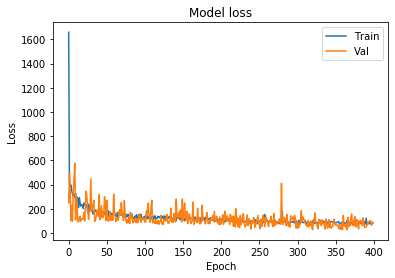

In [20]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [21]:
# serialize model to JSON
model_json = model.to_json()
with open(currentFile/modelNum, "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(currentFile/weightsNum)
print("Saved model to disk")

Saved model to disk


In [22]:
import numpy as np
from numpy import array
arr = []
for x in range(len(X_scale)):
    Xnew = array([[X_scale[x][0], X_scale[x][1] , X_scale[x][2], X_scale[x][3], X_scale[x][4], X_scale[x][5]]])
    ynew = model.predict(Xnew)
    #print(ynew[0][0])
    arr.append(ynew[0][0])
array = np.array(arr)

In [23]:
from sklearn.metrics import r2_score
r2_score(Y.tolist(), array.tolist())

0.7095730902575366

In [24]:
myText = open(currentFile/r2ScoreNum,'w')
myString = str(r2_score(Y.tolist(), array.tolist()))
myText.write(myString)
myText.close()